In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

# Load the Data

In [2]:
df = pd.read_csv('survey_results_public.csv')

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


# Assess the Data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [5]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [6]:
null_less = set(df.columns[df.isnull().mean() > 0.3])
null_less

{'BlockchainIs',
 'BlockchainOrg',
 'CodeRevHrs',
 'CompTotal',
 'ConvertedComp',
 'MgrIdiot',
 'MgrMoney',
 'MgrWant',
 'MiscTechWorkedWith',
 'PurchaseHow',
 'PurchaseWhat'}

In [7]:
df_1 = df.drop(null_less, axis = 1)

In [8]:
df_clean = df_1.dropna(subset = ['EdLevel','Employment','WorkRemote'])

In [9]:
df_clean.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
6,7,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,A lot more welcome now than last year,NaN,42.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult


> **I drop the column with more than 30% of the data missing, because it would be useless and too much biasness on my analysis.**

# Analysis and Visualization

# Q1: Do the frequency of working remotely affects how often do people contribute the open source? 

Text(0.5, 1.0, 'Clustered Bar Chart for WorkRemote and OpenSourcer')

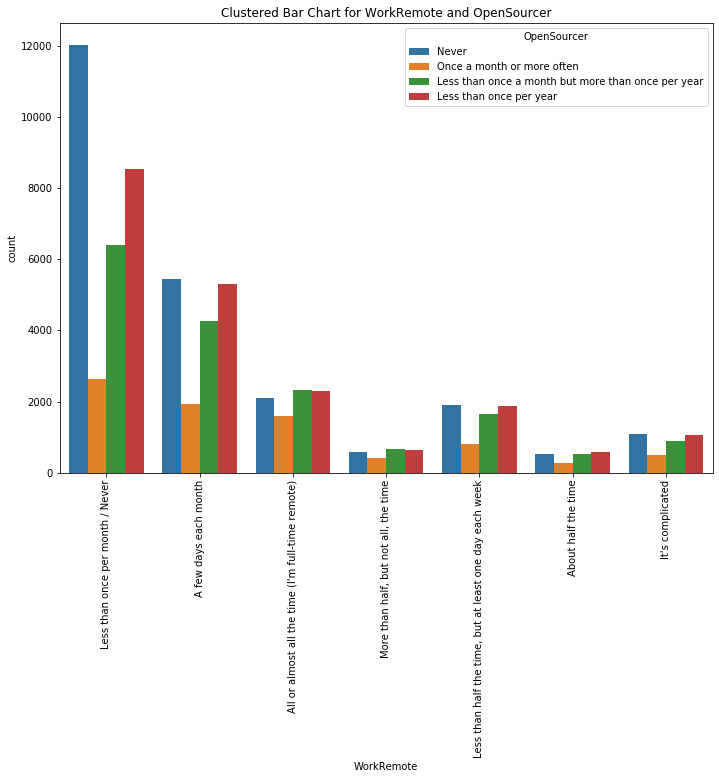

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(data = df_clean, x = 'WorkRemote', hue = 'OpenSourcer')
plt.xticks(rotation = 90)
plt.title('Clustered Bar Chart for WorkRemote and OpenSourcer')

> **It seems that most people don't contribute to open source, but we're able to see a trend in the graph people that people are more frequent and more likely to contribute to an open source if they remote less frequent. I believe this may be in an office setting people are more likely to get their work done when they're working in an office, and they will have extra time to contribute and improve their work. Remote work will be more focus on finishing the work by due day, even people who would like to contribute would more likely to forget after they finish.**

# Q2: With all the survey who answered have a full-time job, what is the most common Education Level? 

In [11]:
df_full = df_clean[df_clean['Employment'] == 'Employed full-time']

In [12]:
df_full.groupby('EdLevel')['Respondent'].count()

EdLevel
Associate degree                                                                       1953
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              30224
I never completed any formal education                                                  242
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           15434
Other doctoral degree (Ph.D, Ed.D., etc.)                                              1889
Primary/elementary school                                                               244
Professional degree (JD, MD, etc.)                                                      816
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2510
Some college/university study without earning a degree                                 6289
Name: Respondent, dtype: int64

Text(0.5, 1.0, 'Pie Chart for Survey Participators Education Level who have a Full-Time Job ')

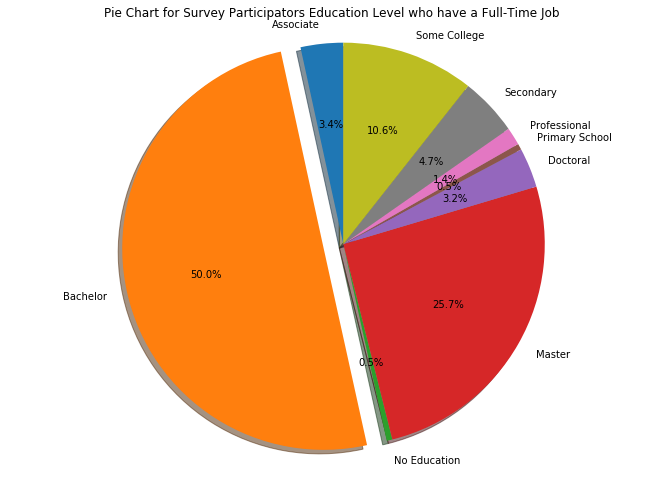

In [13]:
sizes = [2160,31669,290,16260,2013,308,902,2951,6730]
labels = ['Associate','Bachelor','No Education','Master','Doctoral','Primary School','Professional','Secondary','Some College']
explode = [0,0.1,0,0,0,0,0,0,0]


fig1, ax1 = plt.subplots()
fig1.set_size_inches(11.7, 8.27)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Pie Chart for Survey Participators'' Education Level who have a Full-Time Job ')

> **From the above pie chart, we're able to see that half of the population who have a full time only got bachelor degree. This make me thinking that maybe degree is not the most important factor when comes to do technical jobs,what's more important is how to write better and more efficient code. I wonder how many people are actually satisifed with its full time job with bechelor degree. Is higher degree will lead to a better job and higher job satisfaction?**

# Q3: With people who got a bachelor degree and a full time job, what percentage of the people are actually satisfied with their jobs? Is an advanced degree will lead to more job satisfactions? 

In [14]:
def sat_ratio(df):
    return df['JobSat'].value_counts()/df.shape[0]

In [15]:
df_fullbach = df_full[df_full['EdLevel'] == 'Bachelor’s degree (BA, BS, B.Eng., etc.)']

Text(0.5, 1.0, 'Bar Chart for Job Satisfaction (Barchelor)')

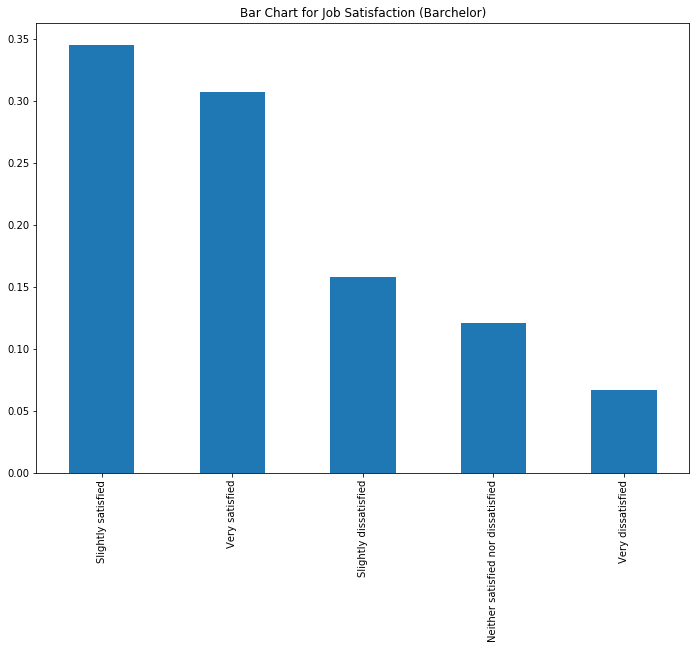

In [16]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(11.7, 8.27)
a = sat_ratio(df_fullbach)
a.plot(kind = 'bar')
plt.title('Bar Chart for Job Satisfaction (Barchelor)')

In [17]:
df_fullma = df_full[df_full['EdLevel'] == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)']

Text(0.5, 1.0, 'Bar Chart for Job Satisfaction (Master)')

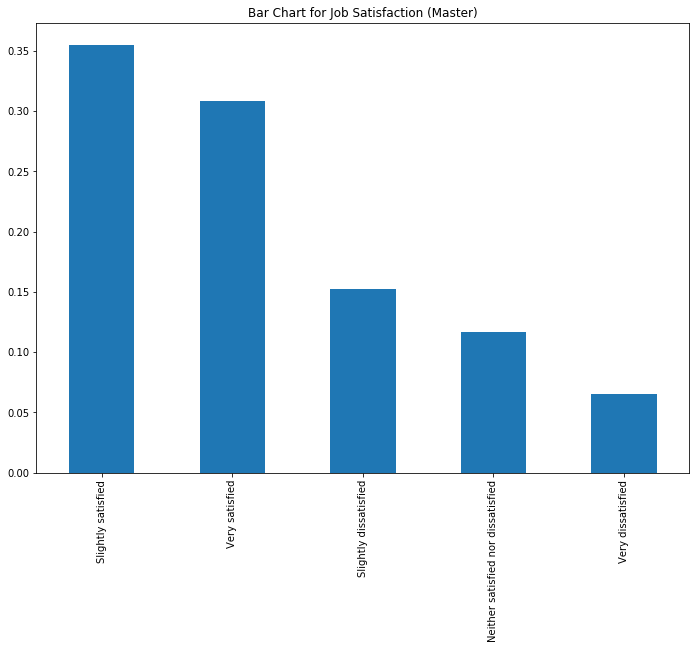

In [18]:
fig2, ax2 = plt.subplots()
fig2.set_size_inches(11.7, 8.27)
b = sat_ratio(df_fullma)
b.plot(kind = 'bar')
plt.title('Bar Chart for Job Satisfaction (Master)')

> **From the above two plots, we're able to see that the there is nearly 60% of the people who have bachelor degree are either slightly satisfied or very satisfied with the full time job. I also did the same for people with master degrees and found similar results. This is an indication that Education Level does not determine how satisfy you are with the job you have. I think it's more important whether you like doing technical work like coding rather than the level of education you achieved.**